<a href="https://colab.research.google.com/github/rhycardo/deep_learning/blob/master/Pre%C3%A7o_de_Imoveis_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

Sumario da RNA
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 501       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________

Accuracia: 88.13%

Matriz de Confusão
     pred_neg  pred_pos
neg        95        14
pos        12        98


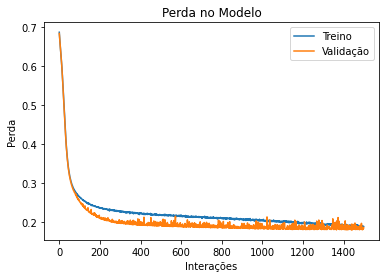

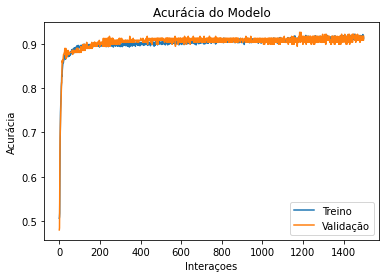

In [0]:
## PREPARAÇÃO DO AMBIENTE DE PROCESSAMENTO
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Inicialização das variáveis randomicas
# sempre com a mesma semente
rn.seed(1)
np.random.seed(1)
tf.compat.v1.set_random_seed(1)

## PREPARAÇÃO DOS DADOS ##
# Obter matriz de dados da URL
dataset = pd.read_csv("https://pastebin.com/raw/UW4Faj4n").values   

x = dataset[:,0:10]
y = dataset[:,10]        

# Normalizar dados da matriz e do vetor 
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)       

# Separação dados de Treinamento (70%) e de Validação + Teste (30%)
xtrn, xvaltst, ytrn, yvaltst = train_test_split(x, y, 
    test_size=0.30, 
    random_state=0,
    shuffle=False)                # Não embaralhar os dados

# Separação dados de Validação (15%) e de Teste (15%)
xval, xtst, yval, ytst = train_test_split(xvaltst, yvaltst, 
    train_size=0.5, 
    random_state=0,
    shuffle=False)                # Não embaralhar os dados

print(xtrn.shape, xval.shape, xtst.shape, ytrn.shape, yval.shape, ytst.shape)

## DEFINIÇÃO DO MODELO DA RNA ##
model = tf.keras.Sequential([
    layers.Dense(500, input_dim=10, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## COMPILAÇÃO DO MODELO ##
model.compile(
    loss="binary_crossentropy",
    optimizer="SGD",
    metrics=["accuracy"]
)

## TREINAMENTO DA RNA ##
num_epochs = 1500
history=model.fit(xtrn, ytrn,
   batch_size=32, 
   epochs=num_epochs, 
   verbose=0,
   validation_data=(xval,yval))

## TESTE DA RNA ##
yprd = model.predict(xtst)
yprd = np.round(yprd,0)

## APRESENTAÇÃO DE RESULTADOS ##
# Sumario da RNA
print("\nSumario da RNA")
model.summary()

# Acurácia
scores = model.evaluate(xtst,ytst, verbose=0)
print("\nAccuracia: %.2f%%" % (scores[1]*100))

# Matriz de confusão
print("\nMatriz de Confusão")
print(pd.DataFrame(confusion_matrix(ytst, yprd),
    index=['neg', 'pos'],
    columns=['pred_neg', 'pred_pos'])
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda no Modelo')
plt.ylabel('Perda')
plt.xlabel('Interações')
plt.legend(['Treino', 'Validação'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Interaçoes')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()